# Usage Example

- How to generate a DRR
- How to use gradients with respect to DRR parameters

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from diffdrr import read_dicom, DRR
from diffdrr.visualization import plot_drr

# Read in the volume
volume, spacing = read_dicom("../DiffDRR/data/cxr", True)

## DRR Generation

The generator is implemented as a custom PyTorch module.

All raytracing operations have been formulated in a vectorized function, enabling use of PyTorch's GPU support and autograd.
This also means that DRR generation is available as a layer in deep learning frameworks.

Timing results are on a single NVIDIA RTX 2080 Ti GPU.

In [87]:
# Read in the volume
volume, spacing = read_dicom("../DiffDRR/data/cxr", True)

# Get parameters for the detector
bx, by, bz = np.array(volume.shape) * np.array(spacing) / 2
detector_kwargs = {
    "sdr"   : 200.0,
    "theta" : np.pi,
    "phi"   : 0,
    "gamma" : np.pi / 2,
    "bx"    : bx,
    "by"    : by,
    "bz"    : bz,
}
detector_kwargs_lat = {
    "sdr"   : 200.0,
    "theta" : np.pi / 2,
    "phi"   : 0,
    "gamma" : np.pi / 2,
    "bx"    : bx,
    "by"    : by,
    "bz"    : bz,
}

# Make the DRR
drr = DRR(volume, spacing, height=200, delx=1.4e-2, device=device.type)
imgAP = drr(**detector_kwargs)  # Parameters need to be initialized only once
imgLAT = drr(**detector_kwargs_lat)  # Parameters need to be initialized only once

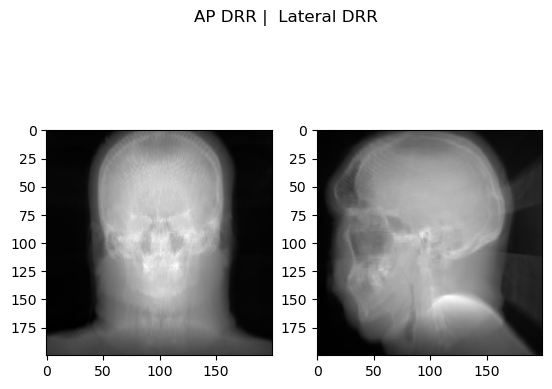

In [106]:
AP = torch.flip(imgAP[0],(1,0)).detach().numpy()
LAT = torch.flip(imgLAT[0],(1,0)).detach().numpy()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('AP DRR |  Lateral DRR')
ax1.imshow(AP, cmap="gray")
ax2.imshow(LAT, cmap="gray")
plt.show()

In [14]:
%timeit drr()

1.93 s ± 225 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Gradients

Gradients of input parameters are computable with autograd.

In [ ]:
imgAP.mean().backward()
drr.rotations.grad, drr.translations.grad

(None, None)

## Try the M1 GPU

Certain PyTorch functions have not yet been ported :(

In [ ]:
# Make DRR
drr = DRR(volume, spacing, height=200, delx=1.4e-2, device="mps")
img = drr(**detector_kwargs)

plot_drr(drr)
plt.show()

ValueError: mps is not available